# SonarQube TS Analysis Multiple Projects in one chart

In [1]:
import pandas as pd
import json
import requests

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
METRICS_ALL = 'accessors,new_technical_debt,blocker_violations,conditions_to_cover,new_it_conditions_to_cover,new_conditions_to_cover,bugs,burned_budget,business_value,class_complexity_distribution,classes,code_smells,comment_lines,commented_out_code_lines,comment_lines_density,comment_lines_data,complexity,class_complexity,file_complexity,function_complexity,complexity_in_classes,complexity_in_functions,branch_coverage,new_it_branch_coverage,new_branch_coverage,conditions_by_line,confirmed_issues,coverage,new_it_coverage,coverage_line_hits_data,new_coverage,covered_conditions_by_line,critical_violations,last_commit_date,directories,duplicated_blocks,new_duplicated_blocks,duplicated_files,duplicated_lines,duplicated_lines_density,new_duplicated_lines,new_duplicated_lines_density,duplications_data,effort_to_reach_maintainability_rating_a,executable_lines_data,false_positive_issues,file_complexity_distribution,files,function_complexity_distribution,functions,generated_lines,generated_ncloc,info_violations,violations,it_conditions_to_cover,it_branch_coverage,it_conditions_by_line,it_coverage,it_coverage_line_hits_data,it_covered_conditions_by_line,it_line_coverage,it_lines_to_cover,it_uncovered_conditions,it_uncovered_lines,line_coverage,new_it_line_coverage,new_line_coverage,lines,ncloc,ncloc_language_distribution,new_lines,lines_to_cover,new_it_lines_to_cover,new_lines_to_cover,sqale_rating,new_maintainability_rating,major_violations,minor_violations,ncloc_data,new_blocker_violations,new_bugs,new_code_smells,new_critical_violations,new_info_violations,new_violations,new_major_violations,new_minor_violations,new_vulnerabilities,open_issues,overall_conditions_to_cover,new_overall_conditions_to_cover,overall_branch_coverage,new_overall_branch_coverage,overall_conditions_by_line,overall_coverage,overall_coverage_line_hits_data,new_overall_coverage,overall_covered_conditions_by_line,overall_line_coverage,new_overall_line_coverage'
METRICS_NOTNULL = 'blocker_violations,bugs,classes,code_smells,comment_lines,comment_lines_density,complexity,class_complexity,file_complexity,function_complexity,confirmed_issues,critical_violations,last_commit_date,directories,duplicated_blocks,duplicated_files,duplicated_lines,duplicated_lines_density,effort_to_reach_maintainability_rating_a,false_positive_issues,file_complexity_distribution,files,function_complexity_distribution,functions,info_violations,violations,lines,ncloc,ncloc_language_distribution,sqale_rating,major_violations,minor_violations,open_issues'
METRICS_NOTNULL_NOT_STRING = 'blocker_violations,bugs,classes,code_smells,comment_lines,comment_lines_density,complexity,class_complexity,file_complexity,function_complexity,confirmed_issues,critical_violations,last_commit_date,directories,duplicated_blocks,duplicated_files,duplicated_lines,duplicated_lines_density,effort_to_reach_maintainability_rating_a,false_positive_issues,files,functions,info_violations,violations,lines,ncloc,major_violations,minor_violations,open_issues'
METRICS_MIRCEA = 'code_smells,bugs,classes,lines,ncloc'
METRICS = METRICS_MIRCEA
SONARQUBE_IP = 'http://195.251.210.166'
SONARQUBE_PORT = '9000'
GITHUB_OWNER = 'eclipse'
GITHUB_REPO = 'winery'
SONARQUBE_PROJECT_KEY = GITHUB_OWNER + ':' + GITHUB_REPO
SONARQUBE_API_URL = SONARQUBE_IP + ':' + SONARQUBE_PORT + '/api/'
SONARQUBE_RESOURCE = 'resource=' + SONARQUBE_PROJECT_KEY
METRICS_LIST = METRICS.split(',')
PROJECT_KEYS = ['eclipse:buildship', 'eclipse:gef', 'eclipse:kapua', 'eclipse:leshan', 'eclipse:nebula', 'eclipse:smarthome', 'spring-projects:spring-data-envers', 'eclipse:tycho', 'eclipse:vorto', 'eclipse:winery']
metrics_list_length = len(METRICS_LIST)

In [4]:
def get_metrics_for_all_the_projects(metric_index):
    df = pd.DataFrame()
    for key in PROJECT_KEYS:
        sq_resource = 'resource=' + key
        response = requests.get(SONARQUBE_API_URL + 'timemachine?' + sq_resource + '&metrics=' + METRICS)
        json_data = json.loads(response.text)
        cells = json_data[0]['cells']  # cells - metric values
        cols = json_data[0]['cols']  # cols - Metrcs

        no_of_commits = len(cells)
        metric_series = []
        for item in cells:
            metric_series.append(item.get('v')[metric_index])
        pds = pd.Series(metric_series, index=list(range(0, no_of_commits)))
        df[key] = pds
    return df

CODE_SMELLS CHART


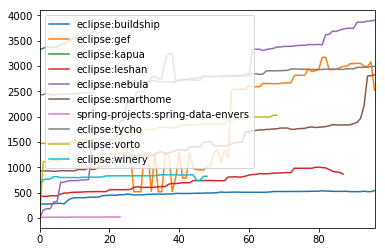

In [5]:
print('code_smells chart'.upper())
df = get_metrics_for_all_the_projects(0)
df.plot()

CODE_SMELLS DIFF CHART


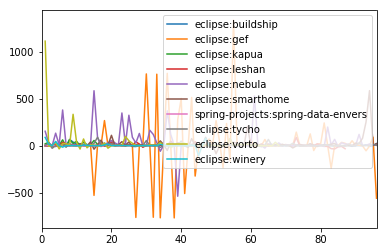

In [6]:
print('code_smells diff chart'.upper())
df_dif = df - df.shift(1)
df_dif.plot()

BUGS CHART


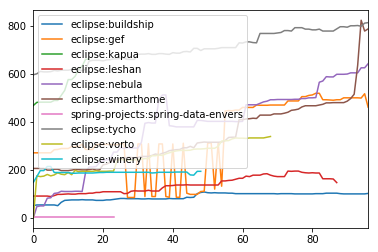

In [7]:
print('bugs chart'.upper())
df = get_metrics_for_all_the_projects(1)
df.plot()

BUGS DIFF CHART


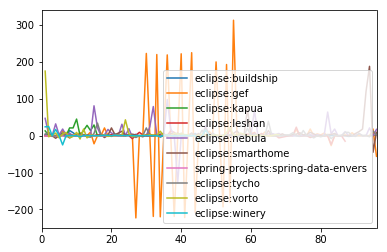

In [8]:
print('bugs diff chart'.upper())
df_dif = df - df.shift(1)
df_dif.plot()

CLASSES CHART


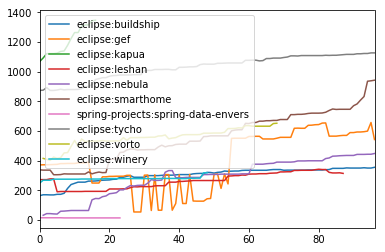

In [9]:
print('classes chart'.upper())
df = get_metrics_for_all_the_projects(2)
df.plot()

CLASSES DIFF CHART


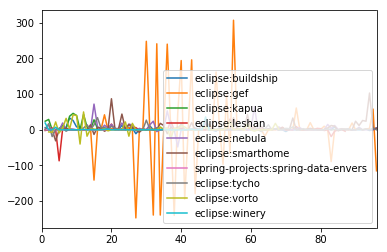

In [10]:
print('classes diff chart'.upper())
df_dif = df - df.shift(1)
df_dif.plot()

LINES CHART


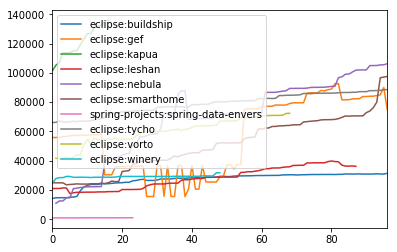

In [11]:
print('lines chart'.upper())
df = get_metrics_for_all_the_projects(3)
df.plot()

LINES DIFF CHART


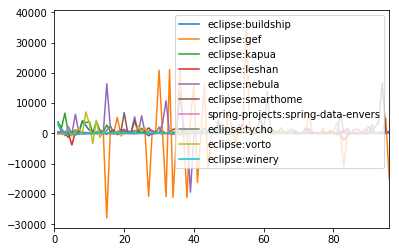

In [12]:
print('lines diff chart'.upper())
df_dif = df - df.shift(1)
df_dif.plot()

NCLOC CHART


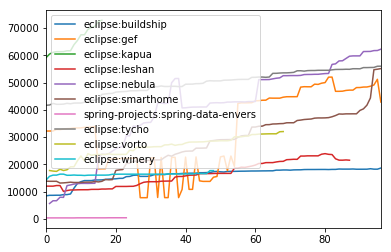

In [13]:
print('ncloc chart'.upper())
df = get_metrics_for_all_the_projects(4)
df.plot()

NCLOC DIFF CHART


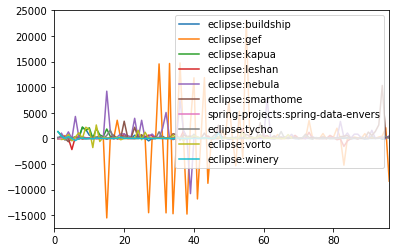

In [14]:
print('ncloc diff chart'.upper())
df_dif = df - df.shift(1)
df_dif.plot()